In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# import dataset
df = pd.read_csv('https://raw.githubusercontent.com/LMU-MSBA/Project-Fashion-Insight/main/Fashion_Retail_Sales.csv')

In [103]:
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [104]:
# Check for missing values
df.isnull().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [105]:
# Check column type
df.dtypes

Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating            float64
Payment Method            object
dtype: object

In [106]:
# Convert 'Date Purchase' from object to date
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])

In [107]:
# Check updated column type
df.dtypes

Customer Reference ID             int64
Item Purchased                   object
Purchase Amount (USD)           float64
Date Purchase            datetime64[ns]
Review Rating                   float64
Payment Method                   object
dtype: object

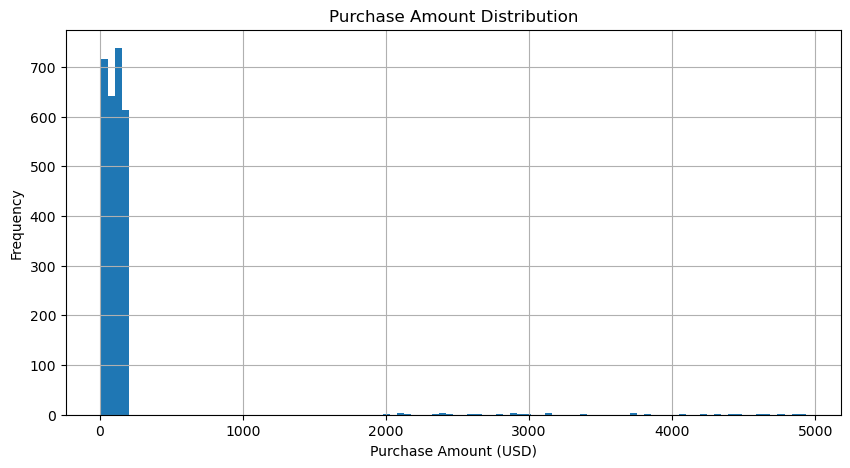

In [108]:
# Visualizing the distribution
plt.figure(figsize=(10, 5))
df['Purchase Amount (USD)'].hist(bins=100)
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

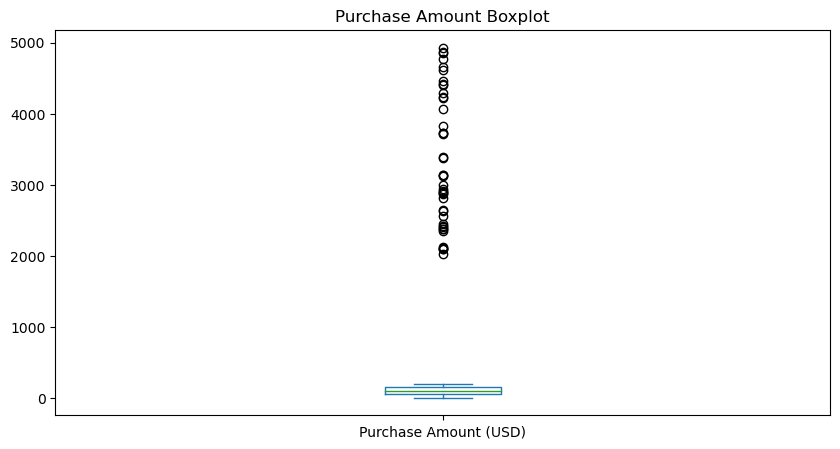

In [109]:
# Checking for outliers with a boxplot
plt.figure(figsize=(10, 5))
df['Purchase Amount (USD)'].plot(kind='box')
plt.title('Purchase Amount Boxplot')
plt.show()


In [110]:
# Impute null 'Purchase Amount' values with median; mean cannot be used because of outliers
median_value = df['Purchase Amount (USD)'].median()
df['Purchase Amount (USD)'].fillna(median_value, inplace=True)

In [111]:
# Check updated nulls
df.isnull().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)      0
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

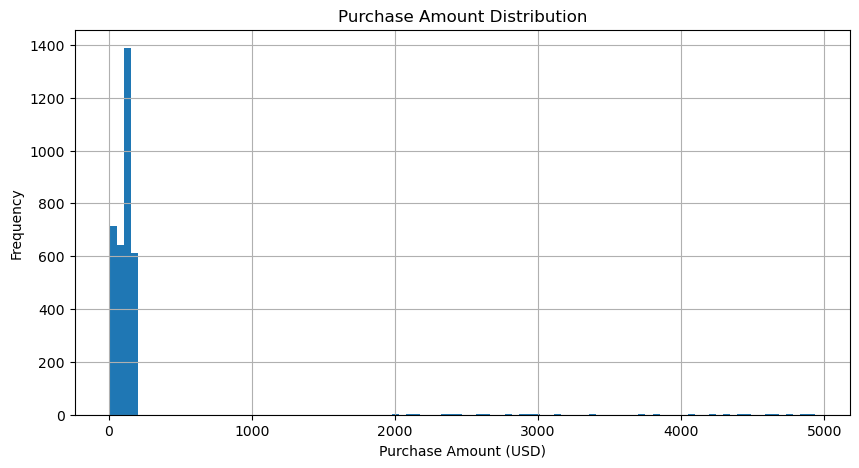

In [112]:
# Visualizing the updated distribution
plt.figure(figsize=(10, 5))
df['Purchase Amount (USD)'].hist(bins=100)
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

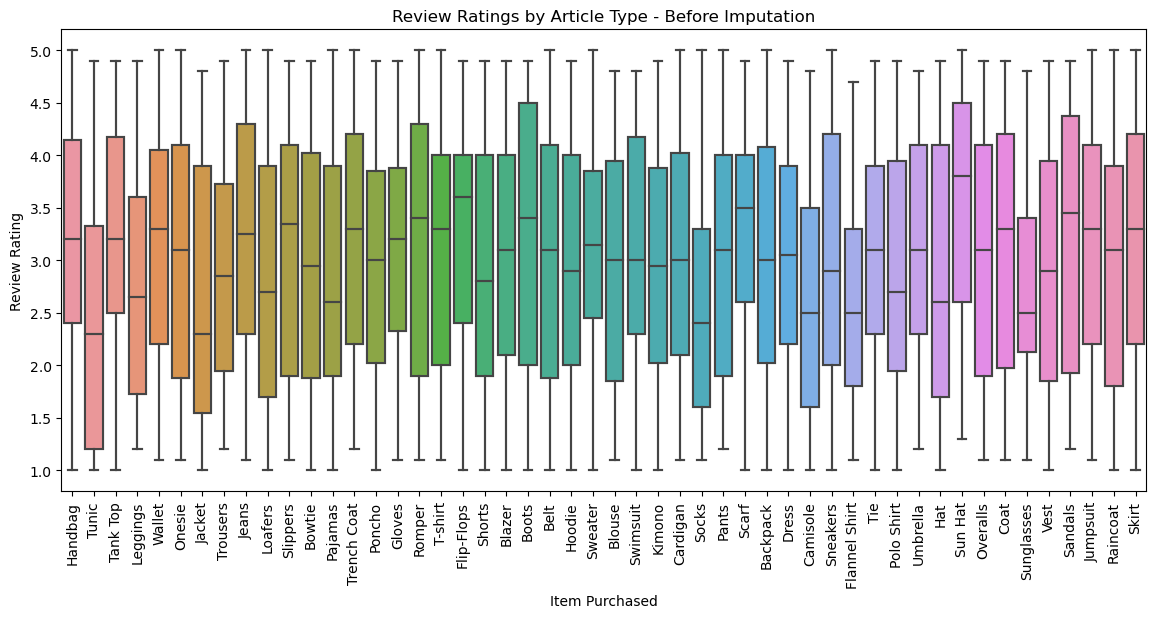

In [113]:
# Visualize the distribution of 'Review Ratings' by 'Item Purchased' before imputation
plt.figure(figsize=(14,6))
sns.boxplot(x= 'Item Purchased', y= 'Review Rating', data= df)
sns.boxplot(x='Item Purchased', y='Review Rating', data=df)
plt.xticks(rotation=90)  # Rotate the x labels to avoid overlap
plt.title('Review Ratings by Article Type - Before Imputation')
plt.show()

In [114]:
# Impute the median 'Review Ratings' by 'Item Purchased'
median_ratings = df.groupby('Item Purchased')['Review Rating'].transform('median')
df['Review Rating'] = df['Review Rating'].fillna(median_ratings)

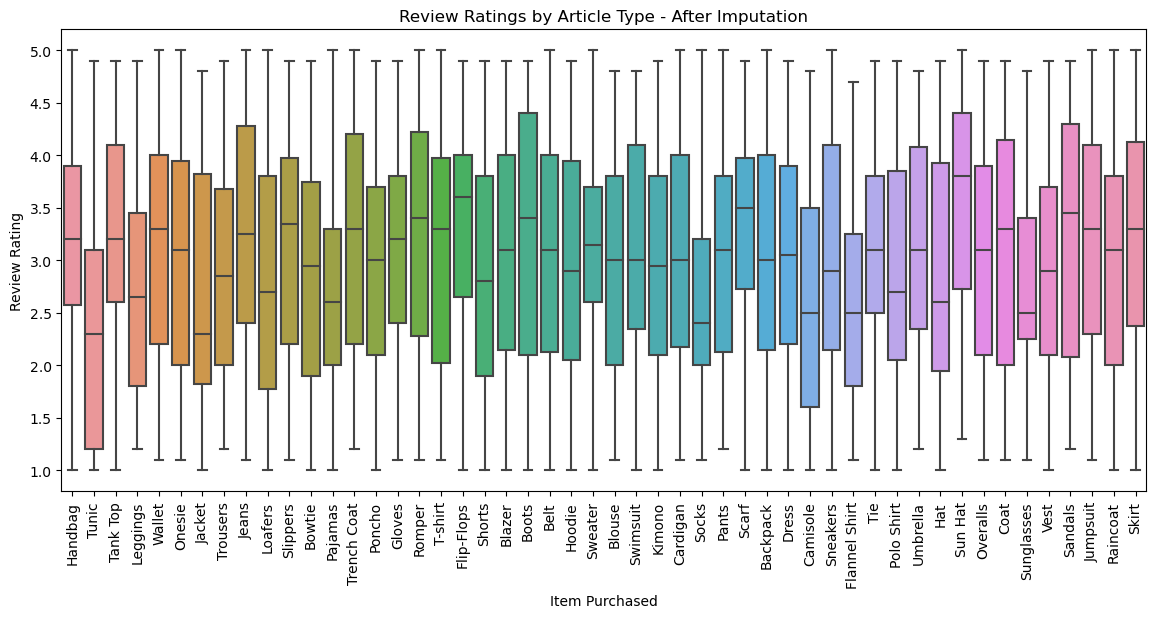

In [115]:
# Visualize the distribution of 'Review Ratings' by 'Item Purchased' after imputation
plt.figure(figsize=(14, 6))
sns.boxplot(x='Item Purchased', y='Review Rating', data=df)
plt.xticks(rotation=90)  # Rotate the x labels to avoid overlap
plt.title('Review Ratings by Article Type - After Imputation')
plt.show()

In [116]:
# Check updated nulls
df.isnull().sum()

Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64

In [118]:
# Export cleaned DataFrame to CSV
df.to_csv('Fashion_Retail_Sales_Clean.csv')